In [2]:
"""
    Dataset Name: Olympic
    Dataset Description: The dataset used  a list of all the medal winners in the Summer Olympics 
    from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.
    
"""

'\n    Dataset Name: Olympic\n    Dataset Description: The dataset used  a list of all the medal winners in the Summer Olympics \n    from 1976 Montreal to 2008 Beijing. It includes each and every medal awarded within the period.\n    \n'

In [185]:
# importing necessary packages for the project
import pandas as pd
import matplotlib
import thinkplot
import numpy as np
import thinkstats2
import random
from __future__ import print_function, division
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline





In [186]:
# reading excel file
olympic_data = pd.read_excel("C:/Users/Saurabh/Desktop/Olympic.xlsx")

In [187]:
olympic_data.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
5,Montreal,1976.0,Aquatics,Diving,10m platform,"LOUGANIS, Gregory",Men,USA,United States,M,Silver
6,Montreal,1976.0,Aquatics,Diving,10m platform,"VAYTSEKHOVSKAYA, Elena",Women,URS,Soviet Union,W,Gold
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze
8,Montreal,1976.0,Aquatics,Diving,10m platform,"DIBIASI, Klaus",Men,ITA,Italy,M,Gold
9,Montreal,1976.0,Aquatics,Diving,10m platform,"ALEINIK, Vladimir",Men,URS,Soviet Union,M,Bronze


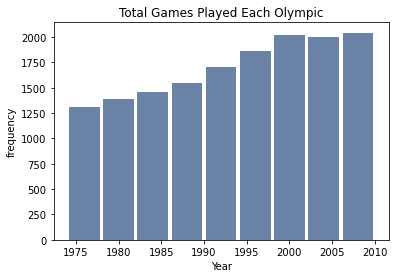

<Figure size 576x432 with 0 Axes>

In [188]:
# Total games played in each successive event. It increases every event until 2004.
hist = thinkstats2.Hist(olympic_data.Year, label='Year')
thinkplot.Hist(hist)
thinkplot.Show(title = "Total Games Played Each Olympic", xlabel='Year', ylabel='frequency')

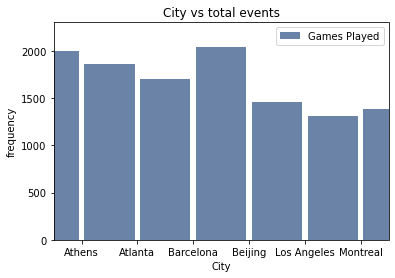

<Figure size 576x432 with 0 Axes>

In [285]:
# total medals from the summer olympics

hist = thinkstats2.Hist(olympic_data.City, label='Games Played')
thinkplot.Hist(hist)
thinkplot.Show(title = "City vs total events", xlabel='City', ylabel='frequency', axis=[0,6, 0, 2300], legend= True)

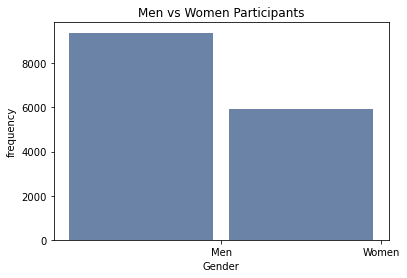

<Figure size 576x432 with 0 Axes>

In [189]:
# Histogram of Men vs Women Participants in the Summer Olympic

hist = thinkstats2.Hist(olympic_data.Gender, label='gender')
thinkplot.Hist(hist)
thinkplot.Show(title = "Men vs Women Participants", xlabel='Gender', ylabel='frequency')



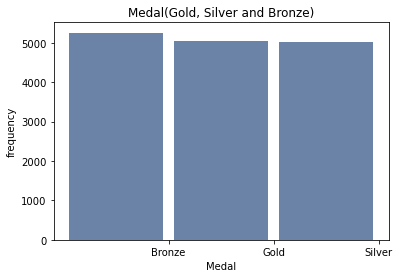

<Figure size 576x432 with 0 Axes>

In [190]:
hist = thinkstats2.Hist(olympic_data.Medal, label='total medal')
thinkplot.Hist(hist)
thinkplot.Show(title = "Medal(Gold, Silver and Bronze)", xlabel='Medal', ylabel='frequency')


In [286]:
us_women = ['Women', 'United States']
filter_gender = olympic_data[(olympic_data['Gender'].isin(us_women)) & olympic_data['Country'].isin(us_women)]

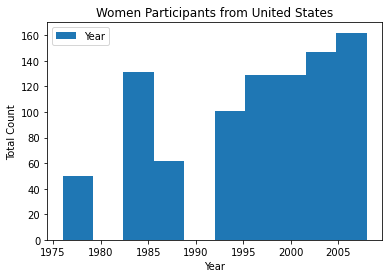

There is increase in women participation with successive event


<Figure size 576x432 with 0 Axes>

In [192]:
filter_gender.plot.hist()
thinkplot.Show(title = "Women Participants from United States", xlabel='Year', ylabel='Total Count')
print("There is increase in women participation with successive event")

In [294]:
# us women in united states frequency in olympic
us_women = ['Women', 'United States']
filter_gender = olympic_data[(olympic_data['Gender'].isin(us_women)) & olympic_data['Country'].isin(us_women)]
filter_gender.head(10)

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal,Before_USSR_Collapse
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze,True
7,Montreal,1976.0,Aquatics,Diving,3m springboard,"POTTER-MCINGVALE, Cynthia",Women,USA,United States,W,Bronze,True
11,Montreal,1976.0,Aquatics,Diving,3m springboard,"CHANDLER, Jennifer Kay",Women,USA,United States,W,Gold,True
12,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Gold,True
18,Montreal,1976.0,Aquatics,Swimming,800m freestyle,"BABASHOFF, Shirley Farber",Women,USA,United States,W,Silver,True
41,Montreal,1976.0,Aquatics,Swimming,800m freestyle,"WEINBERG, Wendy Elizabeth",Women,USA,United States,W,Bronze,True
47,Montreal,1976.0,Aquatics,Swimming,4x100m medley relay,"WRIGHT, Camille",Women,USA,United States,W,Silver,True
51,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"PEYTON, Kim Marie",Women,USA,United States,W,Gold,True
61,Montreal,1976.0,Aquatics,Swimming,100m butterfly,"BOGLIOLI, Wendy Lansbach",Women,USA,United States,W,Bronze,True
88,Montreal,1976.0,Aquatics,Swimming,4x100m freestyle relay,"BOGLIOLI, Wendy Lansbach",Women,USA,United States,W,Gold,True


In [195]:
# New dataframe based on medals won(gold, silver, bronze and total) by each country.
olympic_data1 = pd.get_dummies(olympic_data, columns = ['Medal'])
country_list = list(olympic_data1['Country'].unique())
medal_gold = []
medal_silver = []
medal_bronze = []
for i in country_list:
    x = olympic_data1[olympic_data1["Country"] == i]
    gold = x.Medal_Gold.sum()
    medal_gold.append(gold)
    silver = x.Medal_Silver.sum()
    medal_silver.append(silver)
    bronze = x.Medal_Bronze.sum()
    medal_bronze.append(bronze)

medal = pd.DataFrame({"country": country_list,
    "medal_gold": medal_gold, 'medal_silver': medal_silver,
    'medal_bronze': medal_bronze}) 
medal['medal_total'] = medal.medal_gold + medal.medal_silver + medal.medal_bronze
medal = medal.sort_values(by="medal_total", ascending=False)
medal

,country,medal_gold,medal_silver,medal_bronze,medal_total
2,United States,928,583,481,1992
1,Soviet Union,439,285,297,1021
5,Australia,216,270,312,798
78,Germany,237,176,278,691
51,China,234,252,193,679
...,...,...,...,...,...
70,Djibouti,0,0,1,1
74,Virgin Islands*,0,1,0,1
73,Netherlands Antilles*,0,1,0,1
127,Afghanistan,0,0,1,1


In [196]:
# mean, media, mode and standard deviation of gold medal in the olympic
mean = medal.medal_gold.mean()
median = medal.medal_gold.median()
mode = medal.medal_gold.mode()
std = medal.medal_gold.std()
mean, median, mode, std

(39.390625,
 4.0,
 0    0
 dtype: int64,
 103.56619355200033)

In [197]:
# mean, media, mode and standard deviation of silver medal in the olympic
mean = medal.medal_silver.mean()
median = medal.medal_silver.median()
mode = medal.medal_silver.mode()
std = medal.medal_silver.std()
mean, median, mode, std

(39.1875,
 4.5,
 0    1
 dtype: int64,
 78.87154412359976)

In [288]:
# mean, media, mode and standard deviation of bronze medal
mean = medal.medal_bronze.mean()
median = medal.medal_bronze.median()
mode = medal.medal_bronze.mode()
std = medal.medal_bronze.std()
mean, median, mode, std

(41.078125,
 7.0,
 0    1
 dtype: int64,
 77.06716667384275)

In [260]:
# pmf of bronze and gold medal
bronze_pmf = thinkstats2.Pmf(medal.medal_bronze, label='Bronze')
gold_pmf = thinkstats2.Pmf(medal.medal_gold, label='Gold')

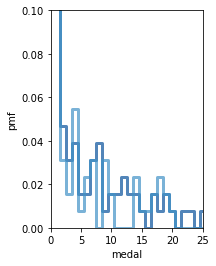

<Figure size 576x432 with 0 Axes>

In [268]:
# plotting bronze and gold medal pmf
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([bronze_pmf, gold_pmf])
thinkplot.Show(xlabel='medal',
               ylabel= 'pmf',
              axis = [0,25,0,.10])

# correlation of medal
correlation = medal.corr()
correlation

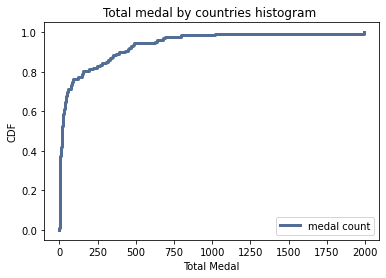

<Figure size 576x432 with 0 Axes>

In [289]:

#Making a CDF of the variable "medal total". It shows how lowest and highest nations total medal count.
cdf = thinkstats2.Cdf(medal.medal_total, label = "medal count")
thinkplot.Cdf(cdf)
thinkplot.Show(title = 'Total medal by countries histogram ',xlabel = 'Total Medal', ylabel = 'CDF')

In [201]:
cdf.Prob(1000)
# 98% of the countries has won more than 1000 medals from 1976 till 2008.

0.984375

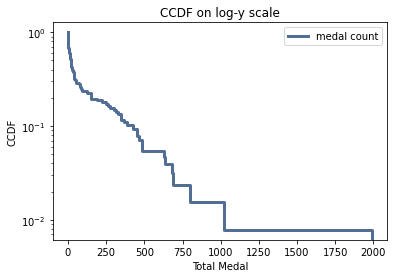

<Figure size 576x432 with 0 Axes>

In [290]:
# Analytical distribution - complimentary cdf of total medal
thinkplot.Cdf(cdf,complement=True)
thinkplot.Show(title = "CCDF on log-y scale", xlabel='Total Medal',
              ylabel='CCDF',
              yscale='log')
# With the argument complement=True, thinkplot.Cdf computes the complementary CDF before plotting. 
# And with yscale=’log’, thinkplot.Show sets the y axis to a log‐ arithmic scale.



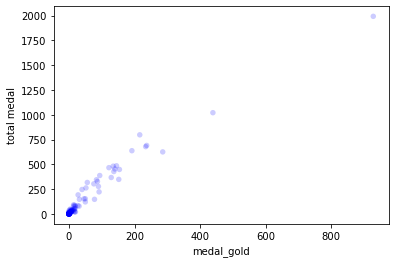

<Figure size 576x432 with 0 Axes>

In [203]:
# Scatterplot of gold medal with silver medal
thinkplot.Scatter(medal.medal_gold, medal.medal_total)
thinkplot.Show(xlabel = 'medal_gold', ylabel = 'total medal')

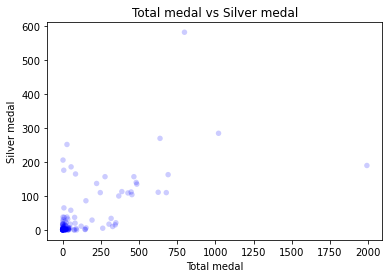

<Figure size 576x432 with 0 Axes>

In [204]:
thinkplot.Scatter(medal.medal_total, medal_silver)
thinkplot.Show(title = "Total medal vs Silver medal", xlabel = 'Total medal', ylabel = 'Silver medal')
#scatterplot of silver medal with total medal

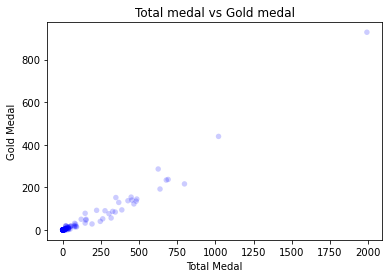

<Figure size 576x432 with 0 Axes>

In [205]:
thinkplot.Scatter(medal.medal_total, medal.medal_gold)
thinkplot.Show(title = "Total medal vs Gold medal", xlabel = 'Total Medal', ylabel = 'Gold Medal')

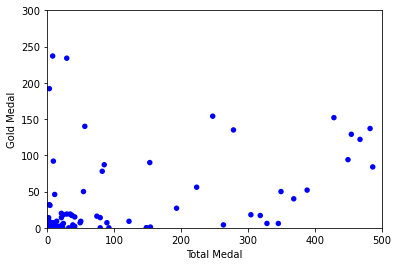

<Figure size 576x432 with 0 Axes>

In [206]:
thinkplot.Scatter(medal.medal_total, medal_gold, alpha = 1)
thinkplot.Show(xlabel='Total Medal',
               ylabel='Gold Medal',
               axis=[0,500 , 0, 300],
               legend = False)
# Based on the Scatterplot many gold medal lied around 1-50 frequency

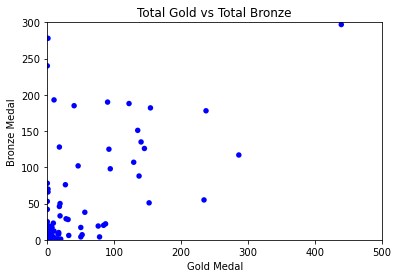

<Figure size 576x432 with 0 Axes>

In [292]:
# Scatterplot comparing two variables
thinkplot.Scatter(medal.medal_gold, medal_bronze, alpha = 1)
thinkplot.Show(title = "Total Gold vs Total Bronze", xlabel='Gold Medal',
               ylabel='Bronze Medal',
               axis=[0,500 , 0, 300],
               legend = False)


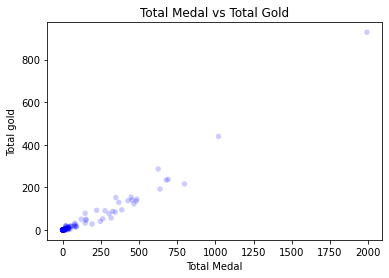

<Figure size 576x432 with 0 Axes>

In [293]:
# Scatterplot using pearsons correlation in 2 scatterplots. One is medal total vs medal gold.

thinkplot.scatter(medal.medal_total, medal.medal_gold)
thinkplot.show(title = "Total Medal vs Total Gold", xlabel = 'Total Medal', 
              ylabel= 'Total gold')

In [209]:
medal_co=medal['medal_total']
Total_gold=medal['medal_gold']
stats.pearsonr_coefficient, ptsefgp_value=stats.pearsonr(medal_co, Total_gold)
print ('Pearson Correlation Coefficient %0.4f' % (stats.pearsonr_coefficient))
# There is a strong correlation between total medal won and total gold won by countries. Higher total medal means the country are likely
# to have won higher gold medal

Pearson Correlation Coefficient 0.9734


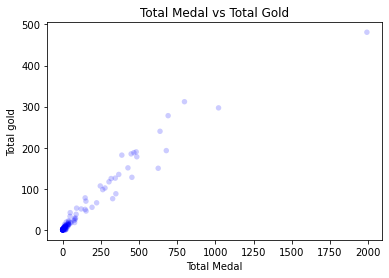

<Figure size 576x432 with 0 Axes>

In [291]:
thinkplot.scatter(medal.medal_total, medal.medal_bronze)
thinkplot.show(title = 'Total Medal vs Total Gold', xlabel = 'Total Medal', 
              ylabel= 'Total gold')

In [211]:
medal_tot=medal['medal_total']
Total_bronze=medal['medal_bronze']
stats.pearsonr_coefficient, ptsefgp_value=stats.pearsonr(medal_tot, Total_bronze)
print ('Pearson Correlation Coefficient %0.4f' % (stats.pearsonr_coefficient))
# there is 97$ chance of those who countries with higher gold medal are likely to have won total medal in higher number.

Pearson Correlation Coefficient 0.9684


In [212]:
# Hypothesis Testing between medal total and medal bronze from the summer olympics

pvalue = stats.spearmanr(Total_bronze, medal_tot)
print(pvalue)
# The p-value is less <0.05 which makes it seem there is correlation between both

SpearmanrResult(correlation=0.9414983330964615, pvalue=2.295468891991432e-61)


In [216]:
# linear regression model to conduct regressional analysis using 1 dependent and 1 explanatory variable
results = smf.ols('medal_total ~ medal_silver', data=medal).fit()

In [215]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_total   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     4308.
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           2.70e-99
Time:                        22:01:31   Log-Likelihood:                -661.60
No. Observations:                 128   AIC:                             1327.
Df Residuals:                     126   BIC:                             1333.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.3416      4.232     -1.026      0.307     -12.717       4.034
medal_silver     3.1642      0.048     65.637      0.000       3.069       3.260
==============================================================================
Omnibus:                       35.190   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.060
Skew:                          -0.672   Prob(JB):                     1.35e-49
Kurtosis:                       9.355   Cond. No.                         98.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""